In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
data= [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
Pclass_surv=train[["Survived","Pclass"]].groupby("Pclass",as_index=False).mean()

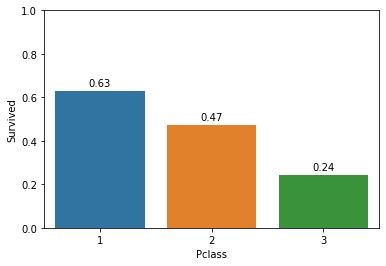

In [44]:
import seaborn as sns

barplot_Pclass_Sur=sns.barplot(x="Pclass",y="Survived",data=Pclass_surv)
plt.ylim([0,1])

for bar in barplot_Pclass_Sur.patches:
    plt.annotate(format(bar.get_height(),".2f"),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha="center",va="center",xytext=(0,8),textcoords="offset points")

C:\Users\Abhineet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


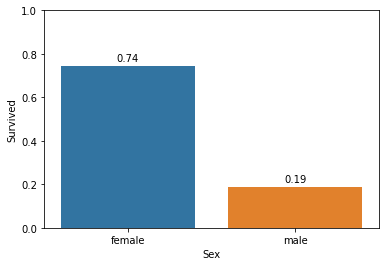

In [47]:
sex_surv=train[["Survived","Sex"]].groupby("Sex",as_index=False).mean()
sex_surv_barplot=sns.barplot("Sex","Survived",data=sex_surv)
plt.ylim([0,1])

for bar in sex_surv_barplot.patches:
    plt.annotate(format(bar.get_height(),".2f"),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha="center",va="center",xytext=(0,8),textcoords="offset points")

C:\Users\Abhineet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 300.0)

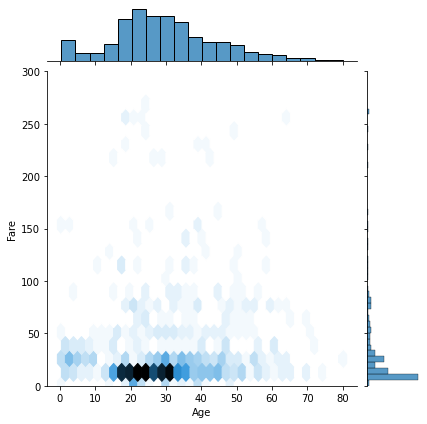

In [49]:
sns.jointplot("Age","Fare",data=train,kind="hex")
plt.ylim([0,300])

In [2]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [3]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [4]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [5]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [6]:
for dataset in full_data:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.522124
1   (16.0, 32.0]  0.358447
2   (32.0, 48.0]  0.365385
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


<ipython-input-6-ab350db0cf93>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


In [7]:
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [8]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [9]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

In [10]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'FamilySize']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))

train = train.values
test  = test.values

   Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone  Title
0         0       3    1    1     0         0        0      1
1         1       1    0    2     3         1        0      3
2         1       3    0    1     1         0        1      2
3         1       1    0    2     3         0        0      3
4         0       3    1    2     1         0        1      1
5         0       3    1    2     1         2        1      1
6         0       1    1    3     3         0        1      1
7         0       3    1    0     2         0        0      4
8         1       3    0    1     1         0        0      3
9         1       2    0    0     2         1        0      3


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

In [ ]:
log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[0::, 1::]
y = train[0::, 0]

acc_dict = {}

In [ ]:
for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	

In [27]:
for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc


In [28]:
acc_dict

{'KNeighborsClassifier': 0.7666666666666667,
 'SVC': 0.8555555555555555,
 'DecisionTreeClassifier': 0.8111111111111111,
 'RandomForestClassifier': 0.8444444444444444,
 'AdaBoostClassifier': 0.8333333333333334,
 'GradientBoostingClassifier': 0.8444444444444444,
 'GaussianNB': 0.8111111111111111,
 'LinearDiscriminantAnalysis': 0.8222222222222222,
 'QuadraticDiscriminantAnalysis': 0.8111111111111111,
 'LogisticRegression': 0.8333333333333334}

In [30]:
for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)


In [32]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.076667
0,SVC,0.085556
0,DecisionTreeClassifier,0.081111
0,RandomForestClassifier,0.084444
0,AdaBoostClassifier,0.083333
0,GradientBoostingClassifier,0.084444
0,GaussianNB,0.081111
0,LinearDiscriminantAnalysis,0.082222
0,QuadraticDiscriminantAnalysis,0.081111
0,LogisticRegression,0.083333


In [2]:
train_df[["Pclass","Survived"]].groupby("Pclass",as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [3]:
train_df[["Survived","Sex"]].groupby("Sex",as_index=False).mean()


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [2]:
avg_age=train_df["Age"].mean()
std_dev_age=train_df["Age"].std()
age_null_count=train_df["Age"].isna().sum()
age_random_list=nm.random.randint(avg_age-std_dev_age,avg_age+std_dev_age,size=age_null_count)


In [10]:
train_df['Age'][nm.isnan(train_df['Age'])] = 5

<ipython-input-10-4f11123bdaa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age'][nm.isnan(train_df['Age'])] = 5


In [7]:
(train_df['Age']==5).sum()

181

In [18]:
age_random_list

array([21, 26, 22, 22, 35, 29, 33, 37, 15, 33, 27, 36, 21, 15, 36, 19, 29,
       20, 18, 25, 28, 33, 24, 33, 20, 35, 35, 15, 31, 19, 29, 19, 29, 39,
       28, 42, 30, 34, 35, 17, 36, 39, 39, 35, 27, 20, 30, 20, 24, 36, 21,
       37, 25, 31, 36, 36, 32, 23, 26, 39, 36, 26, 18, 20, 40, 15, 37, 28,
       43, 22, 25, 34, 25, 18, 31, 36, 15, 35, 15, 23, 15, 26, 43, 42, 32,
       22, 18, 29, 26, 28, 20, 15, 17, 19, 37, 20, 28, 30, 23, 34, 17, 42,
       32, 35, 39, 30, 18, 41, 25, 26, 18, 33, 27, 36, 20, 22, 37, 32, 28,
       42, 17, 37, 34, 32, 43, 15, 38, 36, 31, 27, 21, 43, 16, 38, 17, 27,
       41, 33, 40, 17, 39, 36, 42, 19, 20, 25, 33, 26, 28, 35, 38, 21, 40,
       16, 38, 33, 17, 36, 24, 19, 27, 23, 29, 39, 19, 41, 21, 15, 33, 33,
       36, 22, 34, 19, 42, 15, 25])

In [17]:
train_df['Age'].isna().sum()

0

In [11]:
train_df['Age']=pd.cut(train_df["Age"],5)

In [12]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,"(16.336, 32.252]",1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(32.252, 48.168]",1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,"(16.336, 32.252]",0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(32.252, 48.168]",1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,"(32.252, 48.168]",0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,"(16.336, 32.252]",0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,"(16.336, 32.252]",0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,"(0.34, 16.336]",1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,"(16.336, 32.252]",0,0,111369,30.0000,C148,C


In [29]:
def get_title(name):
	title_search = re.search('[A-Za-z] ', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search
	return ""

In [30]:
import re
train_df['Title'] =train_df['Name'].apply(get_title)

In [31]:
train_df['Title']

0      <re.Match object; span=(15, 17), match='n '>
1      <re.Match object; span=(17, 19), match='n '>
2                                                  
3      <re.Match object; span=(21, 23), match='s '>
4      <re.Match object; span=(17, 19), match='m '>
                           ...                     
886                                                
887    <re.Match object; span=(21, 23), match='t '>
888    <re.Match object; span=(24, 26), match='e '>
889    <re.Match object; span=(13, 15), match='l '>
890                                                
Name: Title, Length: 891, dtype: object